In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns #Visualization
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas import plotting
%matplotlib inline
import missingno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Step 1: Mount Google Drive
%cd /content/gdrive

/content/gdrive


In [4]:
# Step 2: Specify the file path
file_path = '/content/gdrive/MyDrive/Medicine_Details.csv'

In [5]:
# Step 3: Read the CSV file
df = pd.read_csv(file_path)

In [6]:
print('\ table',df.shape)
print('')

\ table (11825, 9)



In [7]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB
None


In [8]:
# Display the first few rows of the dataframe
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [9]:
df.tail()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,67,33,0
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100
11824,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


In [10]:
df.describe()

,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


The average percentage of excellent reviews for medicines is approximately (38.52\%).
The average percentage of average reviews for medicines is approximately (35.76\%).
The average percentage of poor reviews for medicines is approximately (25.73\%).

In [11]:
#pre Statistics of data
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Excellent Review %,11825.0,38.516025,25.225343,0.0,22.0,34.0,51.0,100.0
Average Review %,11825.0,35.756364,18.268134,0.0,27.0,35.0,47.0,88.0
Poor Review %,11825.0,25.727611,23.991985,0.0,0.0,22.0,35.0,100.0


In [12]:
df.describe(include='object').T

,count,unique,top,freq
Medicine Name,11825,11498,Lulifin Cream,4
Composition,11825,3358,Luliconazole (1% w/w),98
Uses,11825,712,Treatment of Type 2 diabetes mellitus,907
Side_effects,11825,1512,Application site reactions burning irritation ...,390
Image URL,11825,11740,"https://onemg.gumlet.io/l_watermark_346,w_480,...",3
Manufacturer,11825,759,Sun Pharmaceutical Industries Ltd,820


In [13]:
#Checking for missing values
df.isna().sum()

,0
Medicine Name,0
Composition,0
Uses,0
Side_effects,0
Image URL,0
Manufacturer,0
Excellent Review %,0
Average Review %,0
Poor Review %,0


In [14]:
df.isnull().any().any()

False

In [15]:
#row wise missing values
df.isna().sum(axis=0).sort_values(ascending=False)

,0
Medicine Name,0
Composition,0
Uses,0
Side_effects,0
Image URL,0
Manufacturer,0
Excellent Review %,0
Average Review %,0
Poor Review %,0


<Axes: >

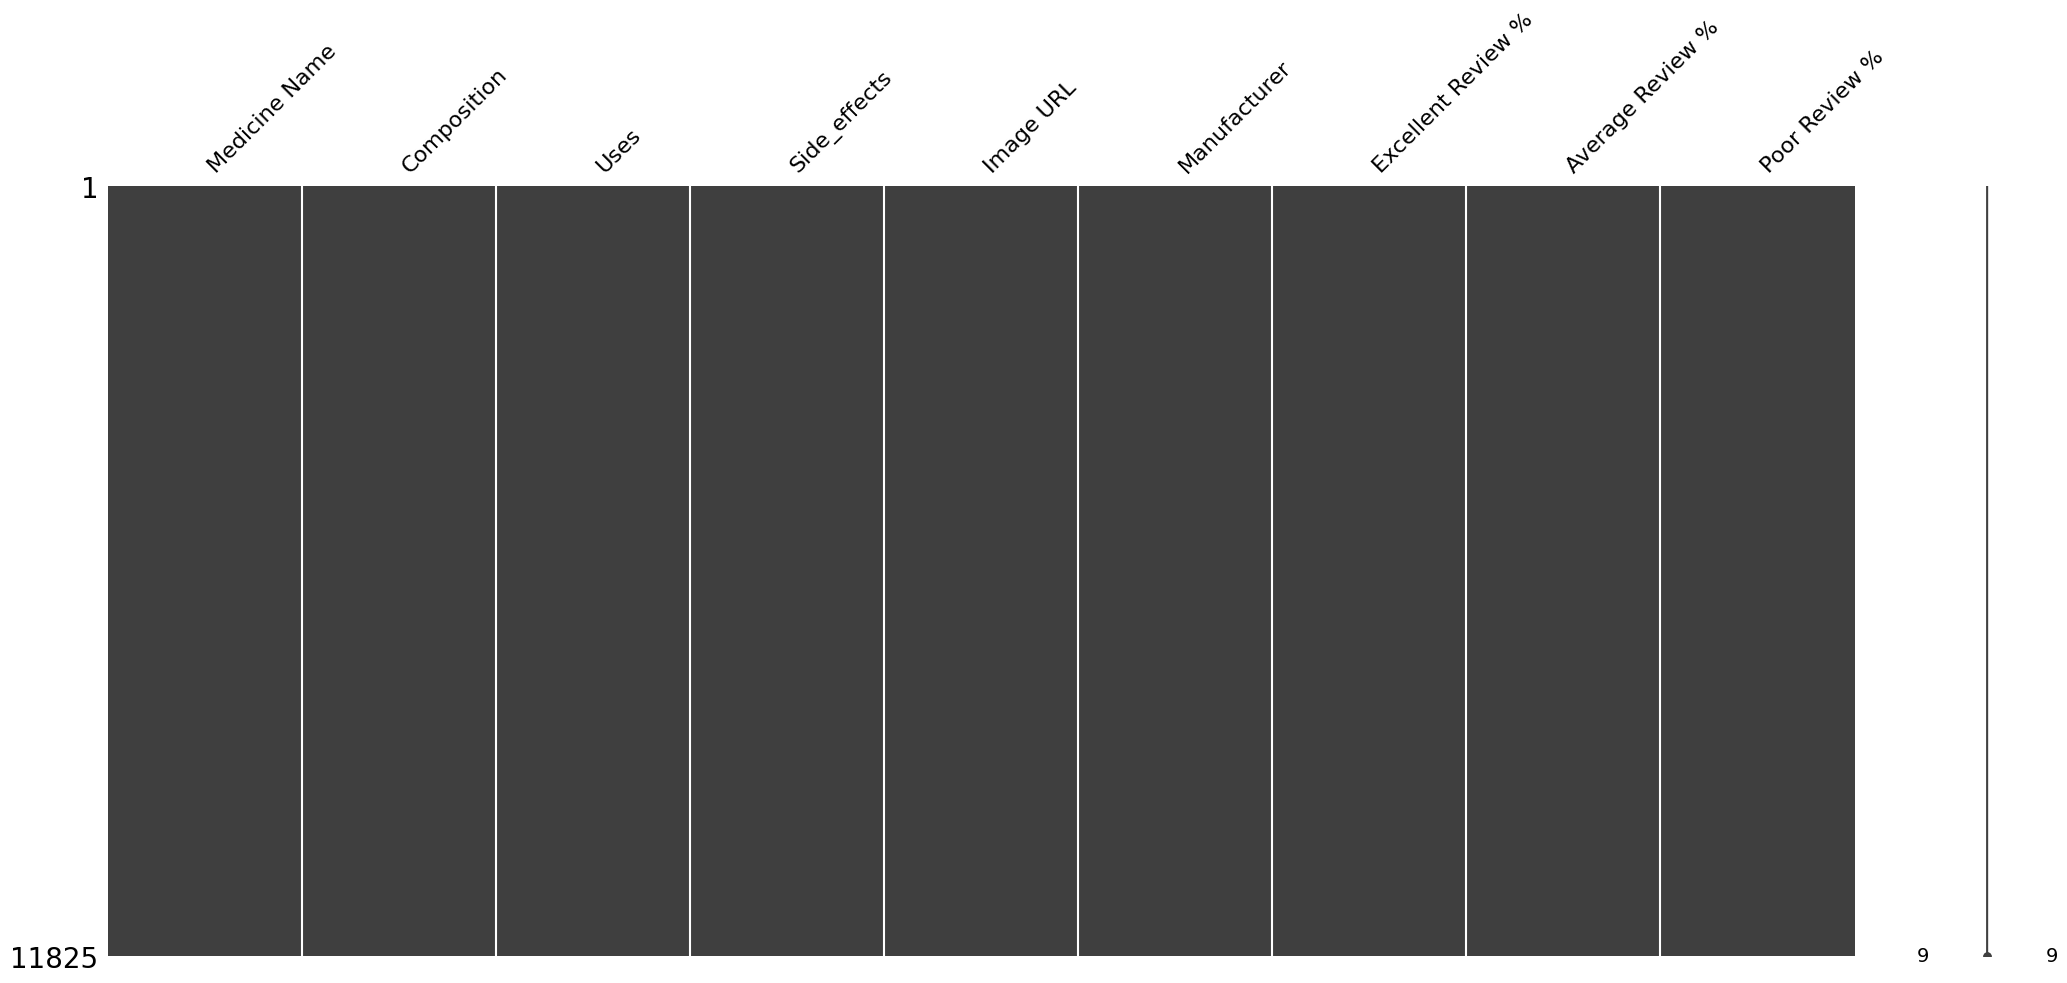

In [16]:
#visually missing numbers
%matplotlib inline
missingno.matrix(df)

<Axes: >

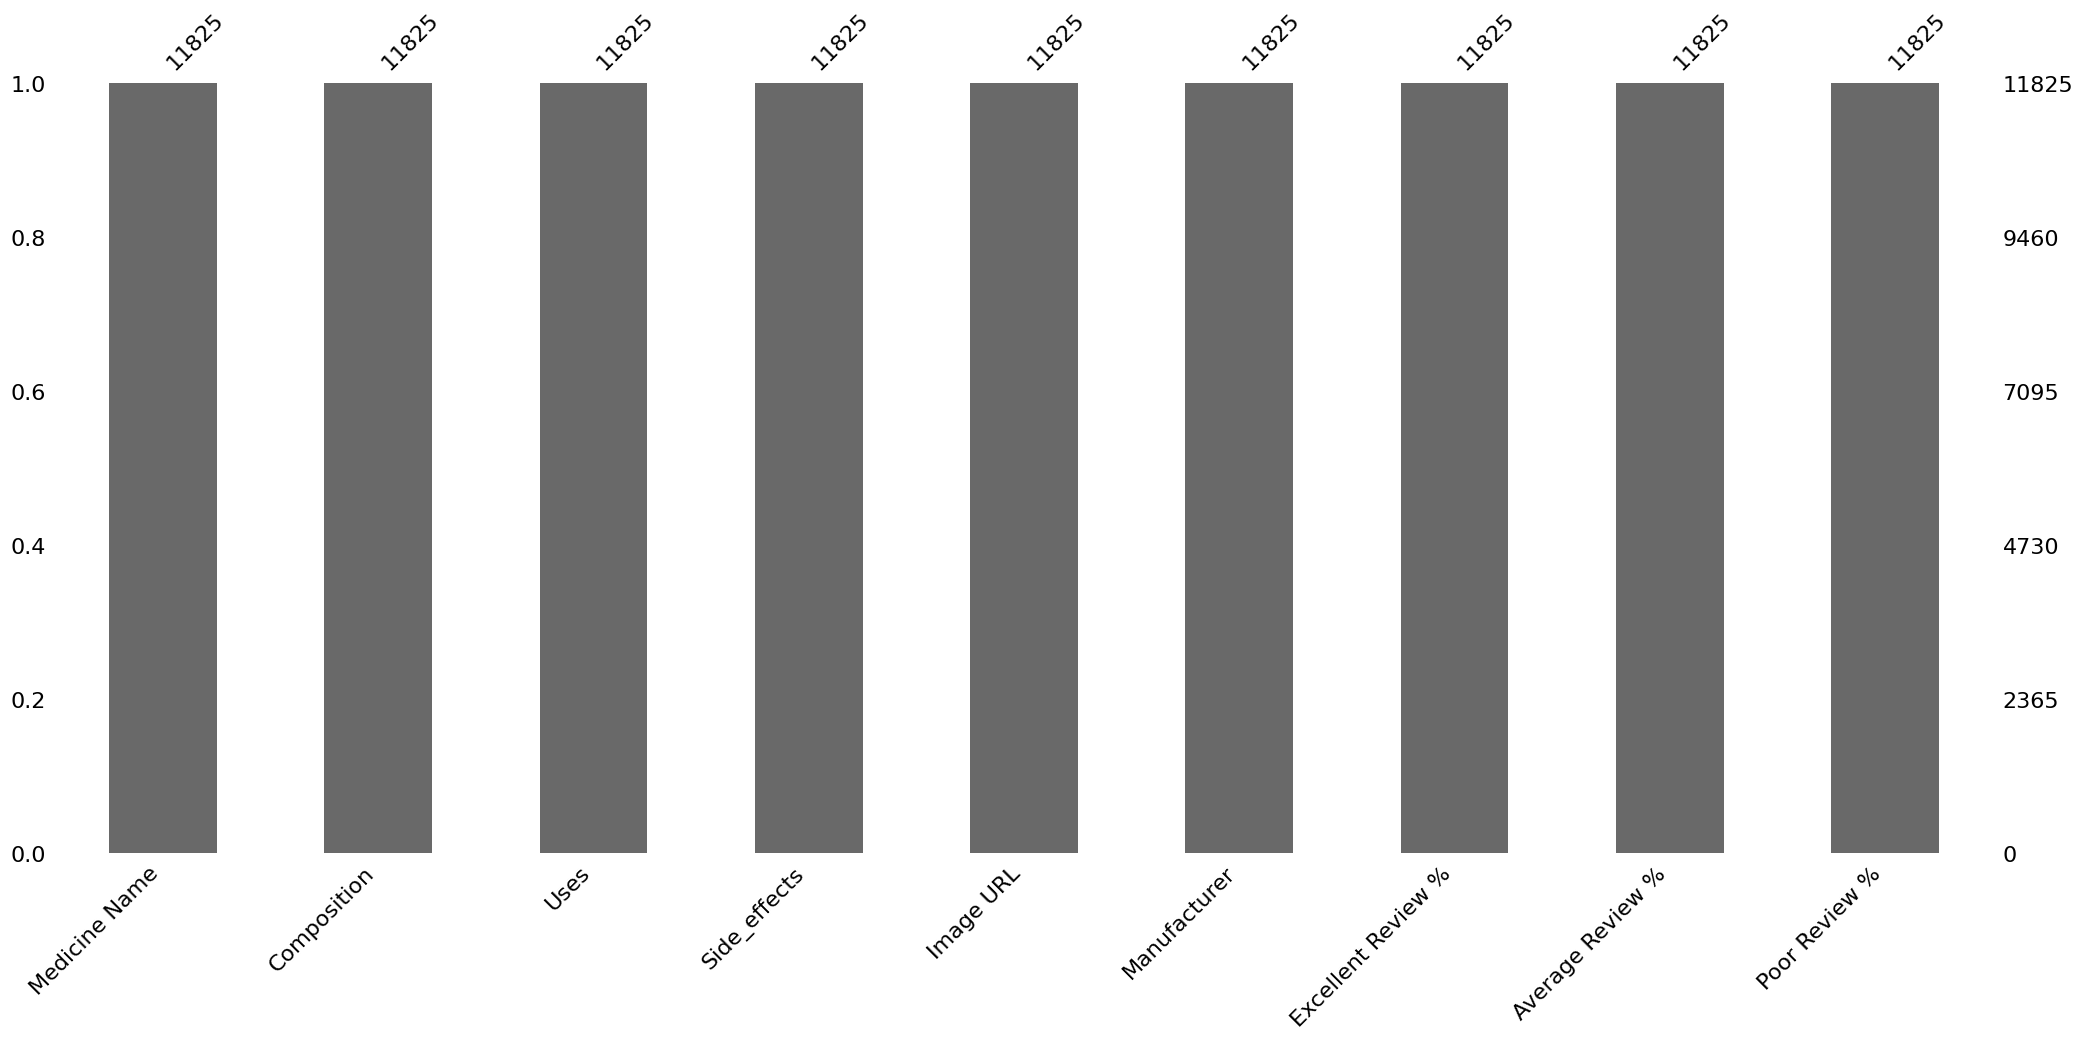

In [17]:
missingno.bar(df)

In [18]:
# Checking for duplicate entries
df.duplicated().sum()

84

In [19]:
# Dropping duplicate entries
medicines = df.drop_duplicates()

In [20]:
medicines.duplicated().sum()

0

# Correlations

In [21]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = df[['Excellent Review %', 'Average Review %', 'Poor Review %']].corr()

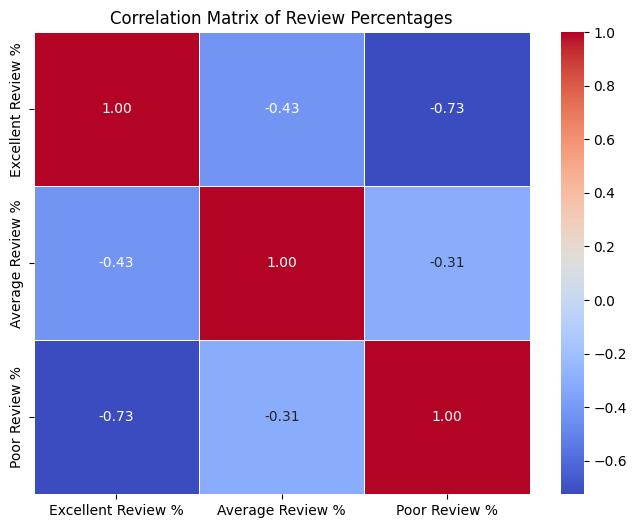

In [22]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set the title of the heatmap
plt.title('Correlation Matrix of Review Percentages')

# Show the plot
plt.show()

# **Exploring Data Analysis EDA**

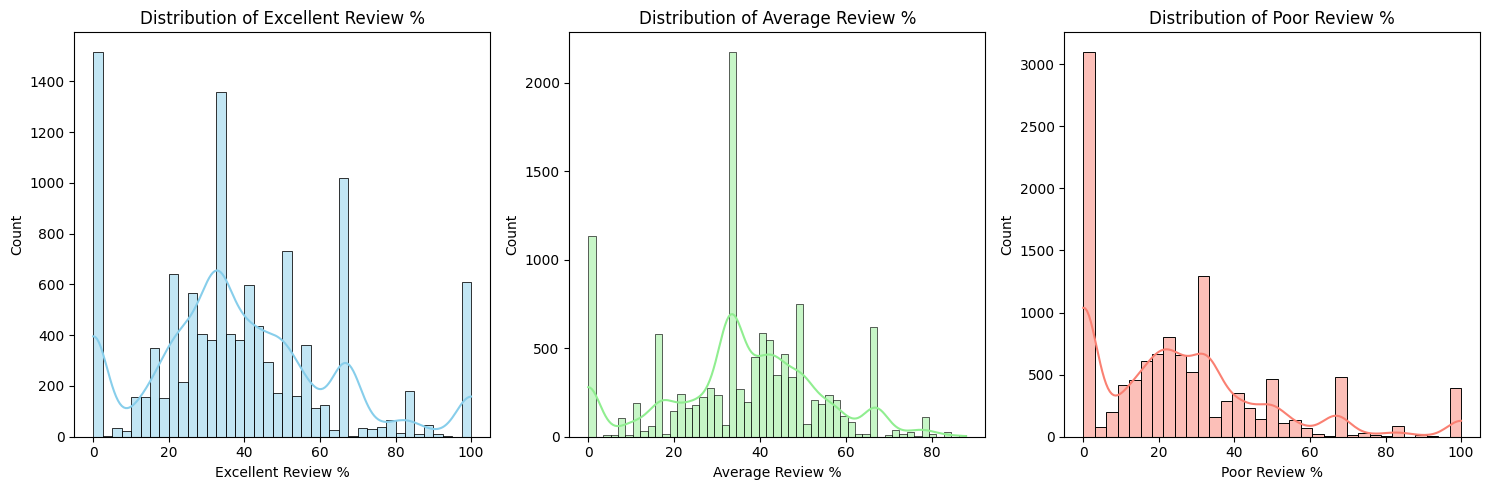

In [23]:
# Visualizing the distribution of the numeric columns
plt.figure(figsize=(15, 5))

# Distribution of Excellent Review %
plt.subplot(1, 3, 1)
sns.histplot(df['Excellent Review %'], kde=True, color='skyblue')
plt.title('Distribution of Excellent Review %')

# Distribution of Average Review %
plt.subplot(1, 3, 2)
sns.histplot(df['Average Review %'], kde=True, color='lightgreen')
plt.title('Distribution of Average Review %')

# Distribution of Poor Review %
plt.subplot(1, 3, 3)
sns.histplot(df['Poor Review %'], kde=True, color='salmon')
plt.title('Distribution of Poor Review %')

plt.tight_layout()
plt.show()

<ipython-input-24-5458ee52e658>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='viridis')


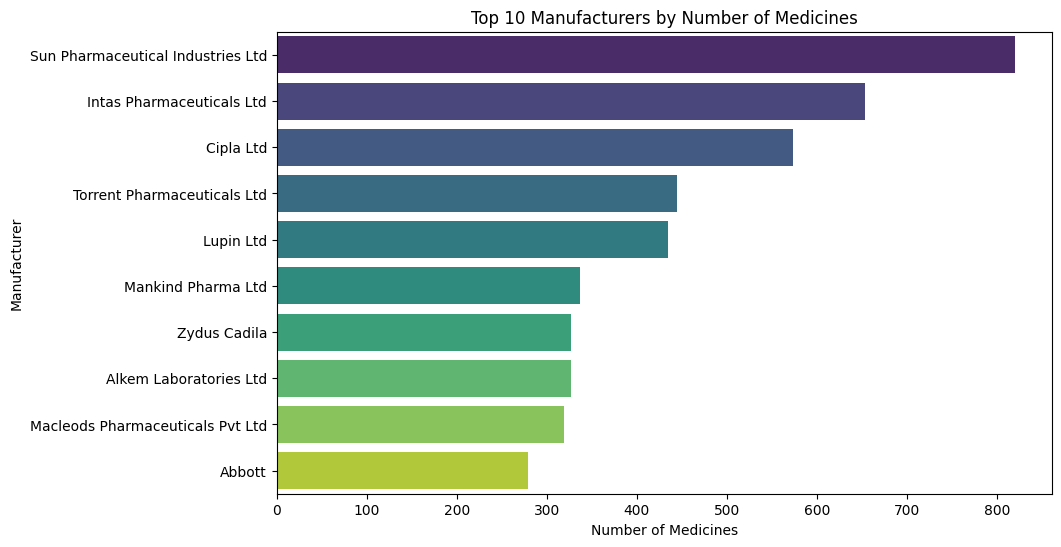

In [24]:
#exploring the categorical variables, particularly focusing on the distribution of the "Manufacturer" and any other interesting categorical data
# Analyzing the distribution of the 'Manufacturer' column
plt.figure(figsize=(10, 6))
top_manufacturers = df['Manufacturer'].value_counts().nlargest(10)
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette='viridis')
plt.title('Top 10 Manufacturers by Number of Medicines')
plt.xlabel('Number of Medicines')
plt.ylabel('Manufacturer')
plt.show()

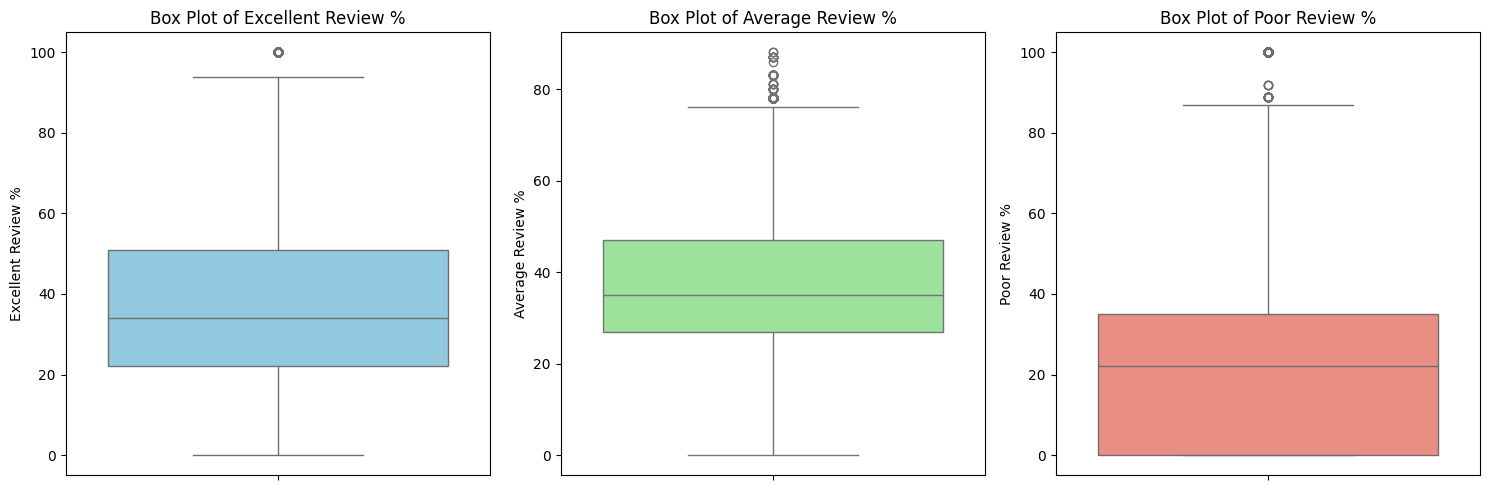

In [25]:
#checking for any potential outliers in the numeric columns (Excellent Review %, Average Review %, and Poor Review %)
# Visualizing potential outliers using box plots
plt.figure(figsize=(15, 5))

# Box plot for Excellent Review %
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Excellent Review %'], color='skyblue')
plt.title('Box Plot of Excellent Review %')

# Box plot for Average Review %
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Average Review %'], color='lightgreen')
plt.title('Box Plot of Average Review %')

# Box plot for Poor Review %
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Poor Review %'], color='salmon')
plt.title('Box Plot of Poor Review %')

plt.tight_layout()
plt.show()

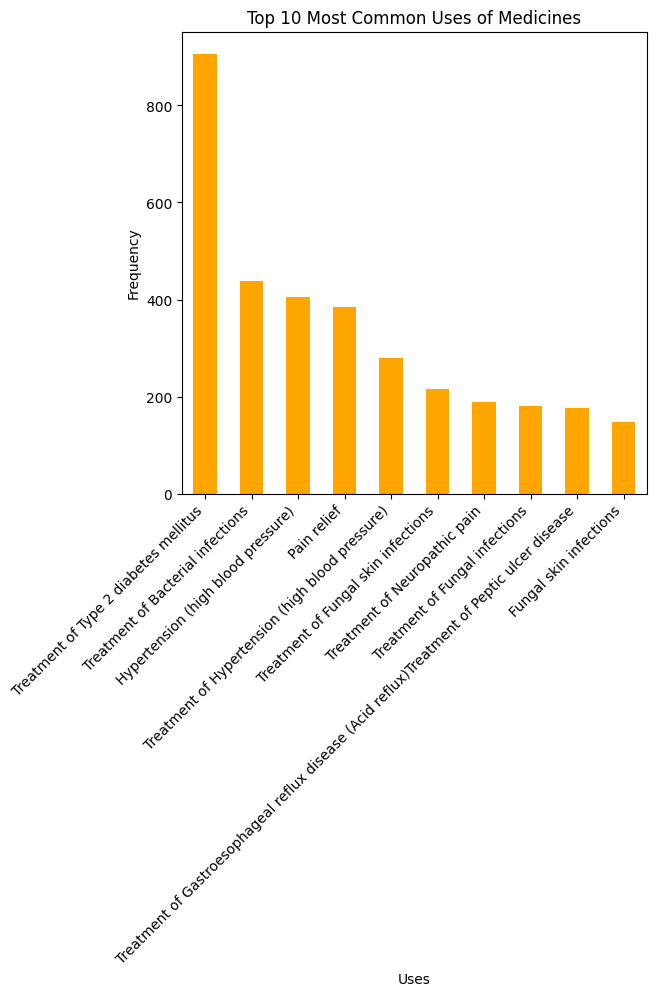

In [26]:
# Recalculate the most common uses of the medicines
uses_stats = df['Uses'].value_counts().head(10)

# Plotting the most common uses of the medicines
plt.figure(figsize=(6, 6))
uses_stats.plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Uses of Medicines')
plt.xlabel('Uses')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
# Grouping the data by manufacturer and finding the medicine with the highest and lowest "Excellent Review %" for each
top_rated = df.loc[df.groupby('Manufacturer')['Excellent Review %'].idxmax()]
bottom_rated = df.loc[df.groupby('Manufacturer')['Poor Review %'].idxmax()]

# Merging the top and bottom-rated medicines into a single dataframe for comparison
comparison_df = pd.merge(top_rated[['Manufacturer', 'Medicine Name', 'Excellent Review %']],
                         bottom_rated[['Manufacturer', 'Medicine Name', 'Poor Review %']],
                         on='Manufacturer',
                         suffixes=('_Top', '_Bottom'))


# Displaying the dataframe
comparison_df.head()

,Manufacturer,Medicine Name_Top,Excellent Review %,Medicine Name_Bottom,Poor Review %
0,A. Menarini India Pvt Ltd,Heximar Ointment,100,Distaclor Drop,100
1,AAA Pharma Trade Pvt Ltd,Nebazine Ointment,33,Nebazine Ointment,0
2,ADN Life Sciences,Fibrocet 50 Tablet,100,Fibrocet 50 Tablet,0
3,ADZO Lifesciences Pvt Ltd,Adcox-P Tablet,100,Adcox-P Tablet,0
4,AGIO Pharmaceuticals Ltd,Agiclob NM Cream,67,Agiclob NM Cream,0


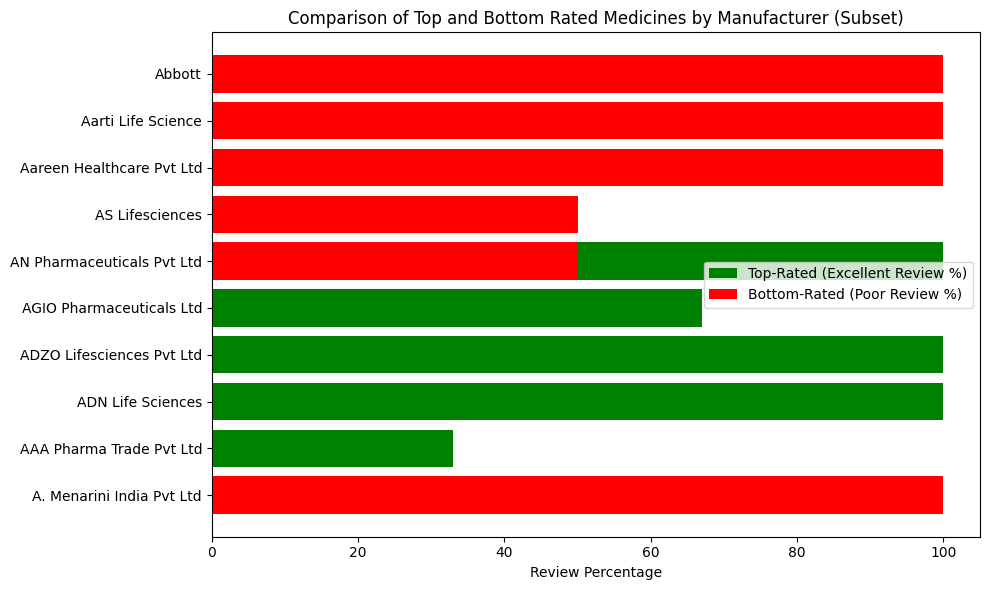

In [28]:
# Selecting a subset of 10 manufacturers for the plot
subset_df = comparison_df.head(10)

# Plotting the comparison of top and bottom-rated medicines by manufacturer for the subset
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Excellent Review %
ax.barh(subset_df['Manufacturer'], subset_df['Excellent Review %'], color='green', label='Top-Rated (Excellent Review %)')
# Plot for Poor Review %
ax.barh(subset_df['Manufacturer'], subset_df['Poor Review %'], color='red', label='Bottom-Rated (Poor Review %)')

# Adding labels and title
ax.set_xlabel('Review Percentage')
ax.set_title('Comparison of Top and Bottom Rated Medicines by Manufacturer (Subset)')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

 let's move on to the Manufacturer Analysis. For this, we'll focus on the top manufacturers (by the number of medicines they produce) and calculate their average review ratings across all the medicines they manufacture.

<ipython-input-29-f15a25fb3fd1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=manufacturer_avg_reviews_sorted.index,


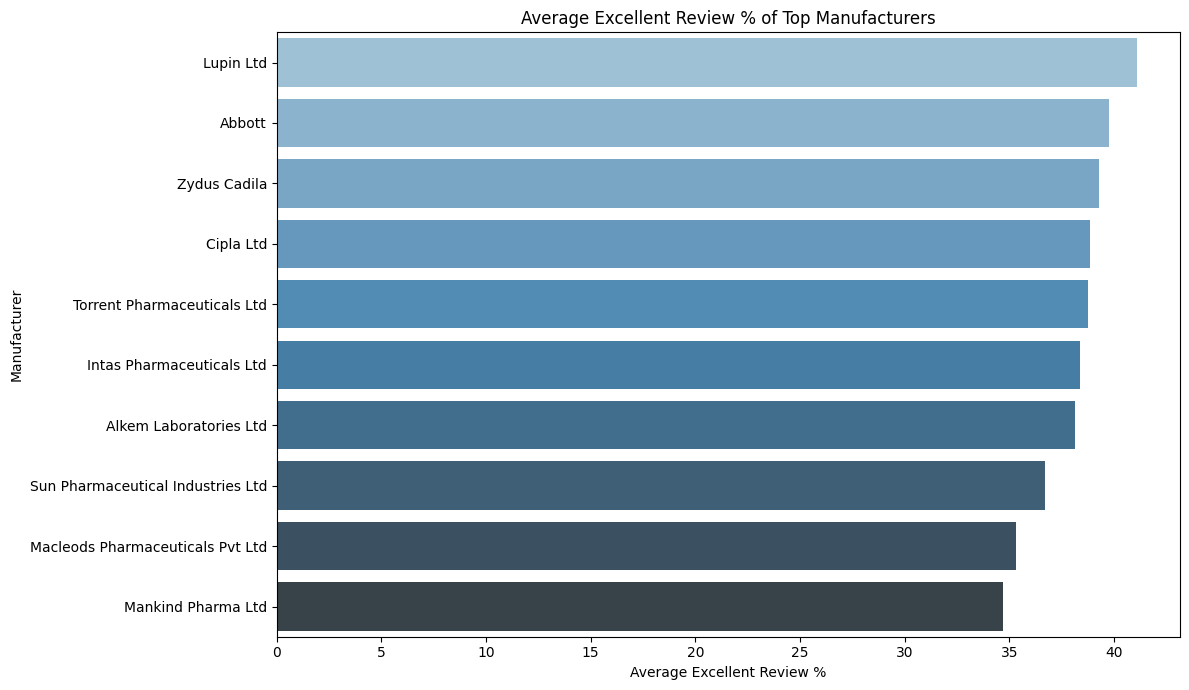

In [29]:
# Calculating the number of medicines produced by each manufacturer
top_manufacturers = df['Manufacturer'].value_counts().head(10)

# Selecting top manufacturers by number of medicines they produce
top_manufacturers_list = top_manufacturers.index.tolist()

# Filtering data for these manufacturers and calculating their average review ratings
manufacturer_avg_reviews = df[df['Manufacturer'].isin(top_manufacturers_list)].groupby('Manufacturer')[['Excellent Review %', 'Average Review %', 'Poor Review %']].mean()

# Sorting manufacturers by average of Excellent Review %
manufacturer_avg_reviews_sorted = manufacturer_avg_reviews.sort_values(by='Excellent Review %', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(y=manufacturer_avg_reviews_sorted.index,
            x=manufacturer_avg_reviews_sorted['Excellent Review %'],
            palette="Blues_d")

# Adding title and labels
plt.title('Average Excellent Review % of Top Manufacturers')
plt.xlabel('Average Excellent Review %')
plt.ylabel('Manufacturer')

# Display the plot
plt.tight_layout()
plt.show()

Analyzing the side effects across the dataset can provide insights into how frequently certain side effects occur and if there are any patterns related to specific medicines or manufacturers. Here's how I can approach this:

Frequency of Side Effects: I will count how often each side effect appears across all medicines.
Common Side Effects: I will identify the most common side effects in the dataset.
Side Effects by Manufacturer: I will examine if certain manufacturers have a higher occurrence of specific side effects.

In [30]:
# Splitting the side effects into individual entries
side_effects_series = df['Side_effects'].str.split(expand=True).stack()

# Counting the frequency of each side effect
side_effects_count = side_effects_series.value_counts()

# Displaying the most common side effects
side_effects_count.head(10)

,count
Nausea,6216
pain,6125
Headache,5374
in,4679
Diarrhea,4553
blood,4070
Dizziness,4064
of,3581
Vomiting,3499
Increased,2843


The analysis of side effects shows the most commonly mentioned terms. However, some of these terms, such as "in," "of," and "blood," are not actual side effects but rather parts of phrases. This indicates that I need to clean the data by removing irrelevant terms and focusing on actual side effects.

In [31]:
# Define a list of common irrelevant terms to remove
irrelevant_terms = ['in', 'of', 'to', 'and', 'the', 'with', 'for', 'or', 'as', 'by']

# Filter out irrelevant terms
filtered_side_effects_count = side_effects_count[~side_effects_count.index.isin(irrelevant_terms)]

# Display the most common side effects after filtering
filtered_side_effects_count.head(10)

,count
Nausea,6216
pain,6125
Headache,5374
Diarrhea,4553
blood,4070
Dizziness,4064
Vomiting,3499
Increased,2843
Abdominal,2135
level,2034


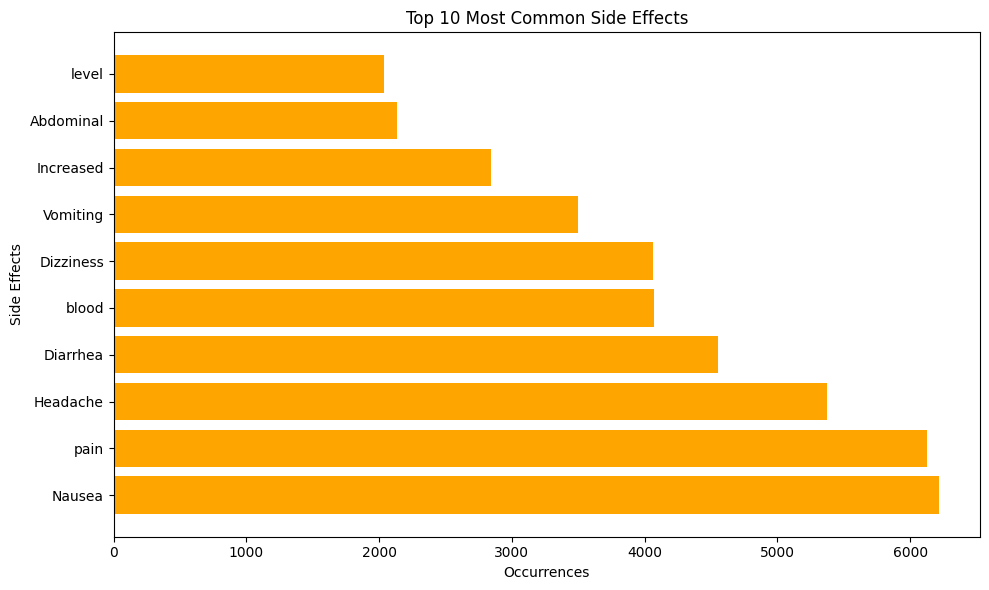

In [32]:
# Plotting the most common side effects
top_side_effects = filtered_side_effects_count.head(10)

fig, ax = plt.subplots(figsize=(10, 6))

# Horizontal bar chart
ax.barh(top_side_effects.index, top_side_effects.values, color='orange')

# Adding labels and title
ax.set_xlabel('Occurrences')
ax.set_ylabel('Side Effects')
ax.set_title('Top 10 Most Common Side Effects')

# Displaying the plot
plt.tight_layout()
plt.show()

In [33]:
# Top 10 medicines with highest percentage of excellent reviews
top_excellent_reviews = df.nlargest(10, 'Excellent Review %')[['Medicine Name', 'Excellent Review %']]

top_excellent_reviews

,Medicine Name,Excellent Review %
257,Atormac CV10 Capsule,100
258,Alphadol 0.25mcg Capsule,100
437,Atorva 5 Tablet,100
444,Azapure Tablet,100
510,Alides 5mg Tablet,100
512,Azenam 1gm Injection,100
515,Abhayrab-PF Vaccine,100
575,Azithral 500mg Injection,100
590,Atropine Sulphate 1% Eye Ointment,100
598,ATR-F Tablet,100


In [34]:
# Top 10 medicines with highest percentage of average reviews
top_average_reviews = df.nlargest(10, 'Average Review %')[['Medicine Name', 'Average Review %']]

top_average_reviews

,Medicine Name,Average Review %
4055,K-Cit Oral Solution,88
4827,Livoluk Oral Solution,88
795,Adnurve SR Tablet,87
2945,GB 29 Plus Tablet,87
3664,Itaspor 200 Capsule,87
5861,Metzok 12.5 Tablet PR,87
6595,Nebula-D Tablet SR,87
6675,Novonorm 2mg Tablet,87
9083,Sevcar 400 Tablet,87
7520,Preva Gold 10 Capsule,86


In [35]:
# Top 10 medicines with highest percentage of poor reviews
top_poor_reviews = df.nlargest(10, 'Poor Review %')[['Medicine Name', 'Poor Review %']]

top_poor_reviews

,Medicine Name,Poor Review %
24,Aricep 10 Tablet,100
308,Altonil 5 Tablet MD,100
412,Avas 40 Tablet,100
483,Albutamol Neo Syrup,100
504,Altiva 120mg Tablet,100
564,Amclaid 625 Tablet,100
588,Aziwok-XL 200 Liquid,100
595,Apresol Plus Tablet,100
603,Aggramed 5mg Infusion,100
629,Advent Forte 457mg Syrup Tangy Orange,100


<ipython-input-36-791f37783329>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_compositions.index, x=top_compositions.values, palette="magma")


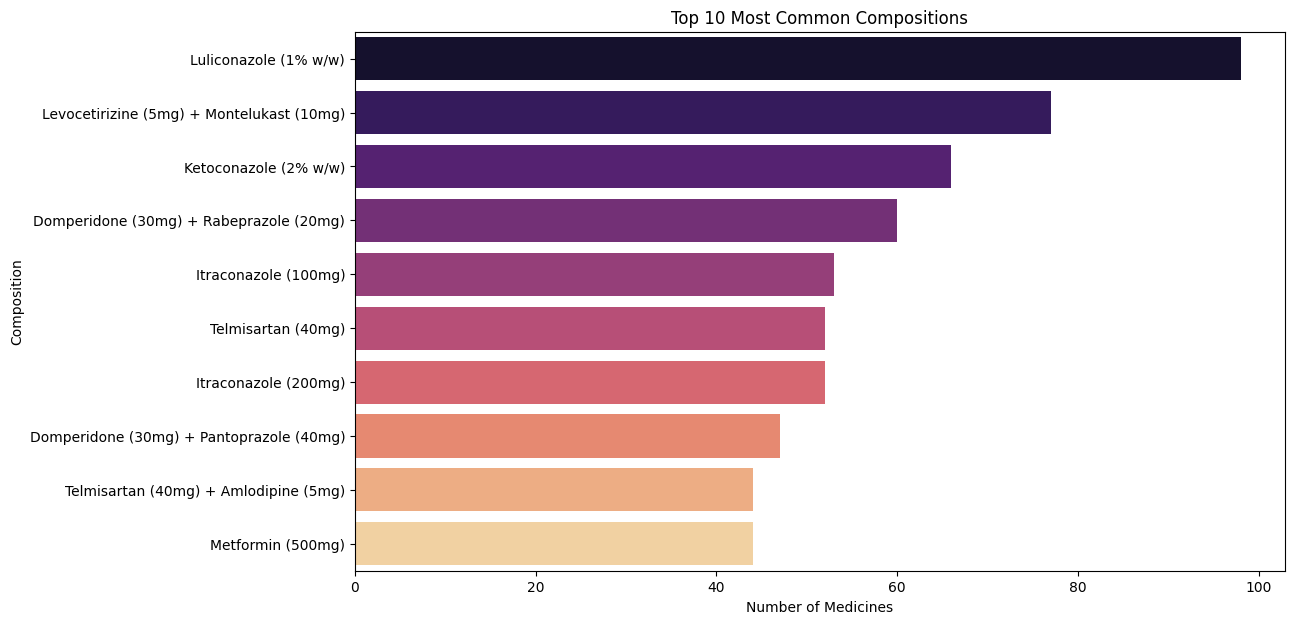

In [36]:
# Top 10 most common compositions
top_compositions = df['Composition'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=top_compositions.index, x=top_compositions.values, palette="magma")
plt.title('Top 10 Most Common Compositions')
plt.xlabel('Number of Medicines')
plt.ylabel('Composition')
plt.show()

<ipython-input-37-310a31da093d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=uses.index, x=uses.values, palette="cubehelix")


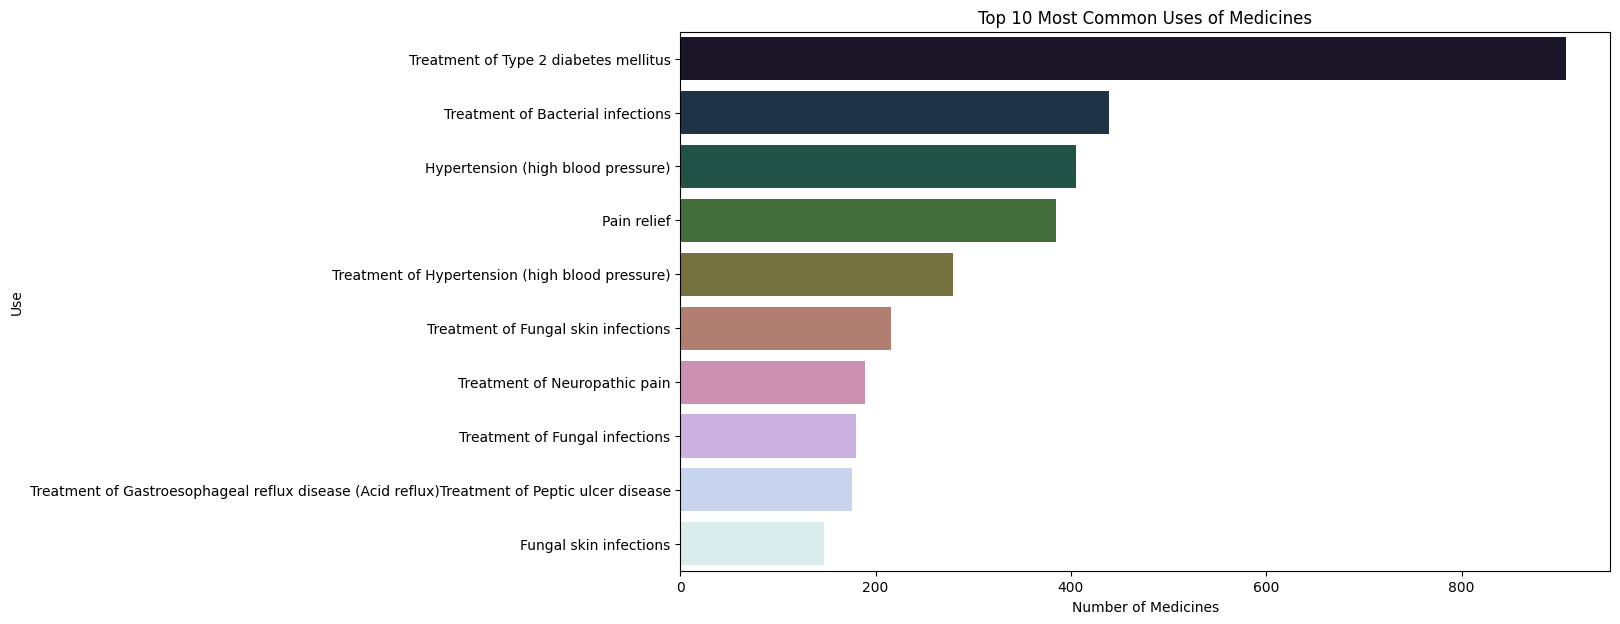

In [37]:
#Given "Uses" column might have multiple uses separated by commas, we need to split them and count the occurrences of each use
# Splitting the uses and counting the occurrences
uses = df['Uses'].str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=uses.index, x=uses.values, palette="cubehelix")
plt.title('Top 10 Most Common Uses of Medicines')
plt.xlabel('Number of Medicines')
plt.ylabel('Use')
plt.show()

let's proceed to the Side Effects Analysis. Similar to the uses, the "Side_effects" column might contain multiple side effects separated by commas. We'll split them and count the occurrences of each side effect to determine the most frequently mentioned side effects.

<ipython-input-38-9ed28ff9284b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=side_effects.index, x=side_effects.values, palette="coolwarm")


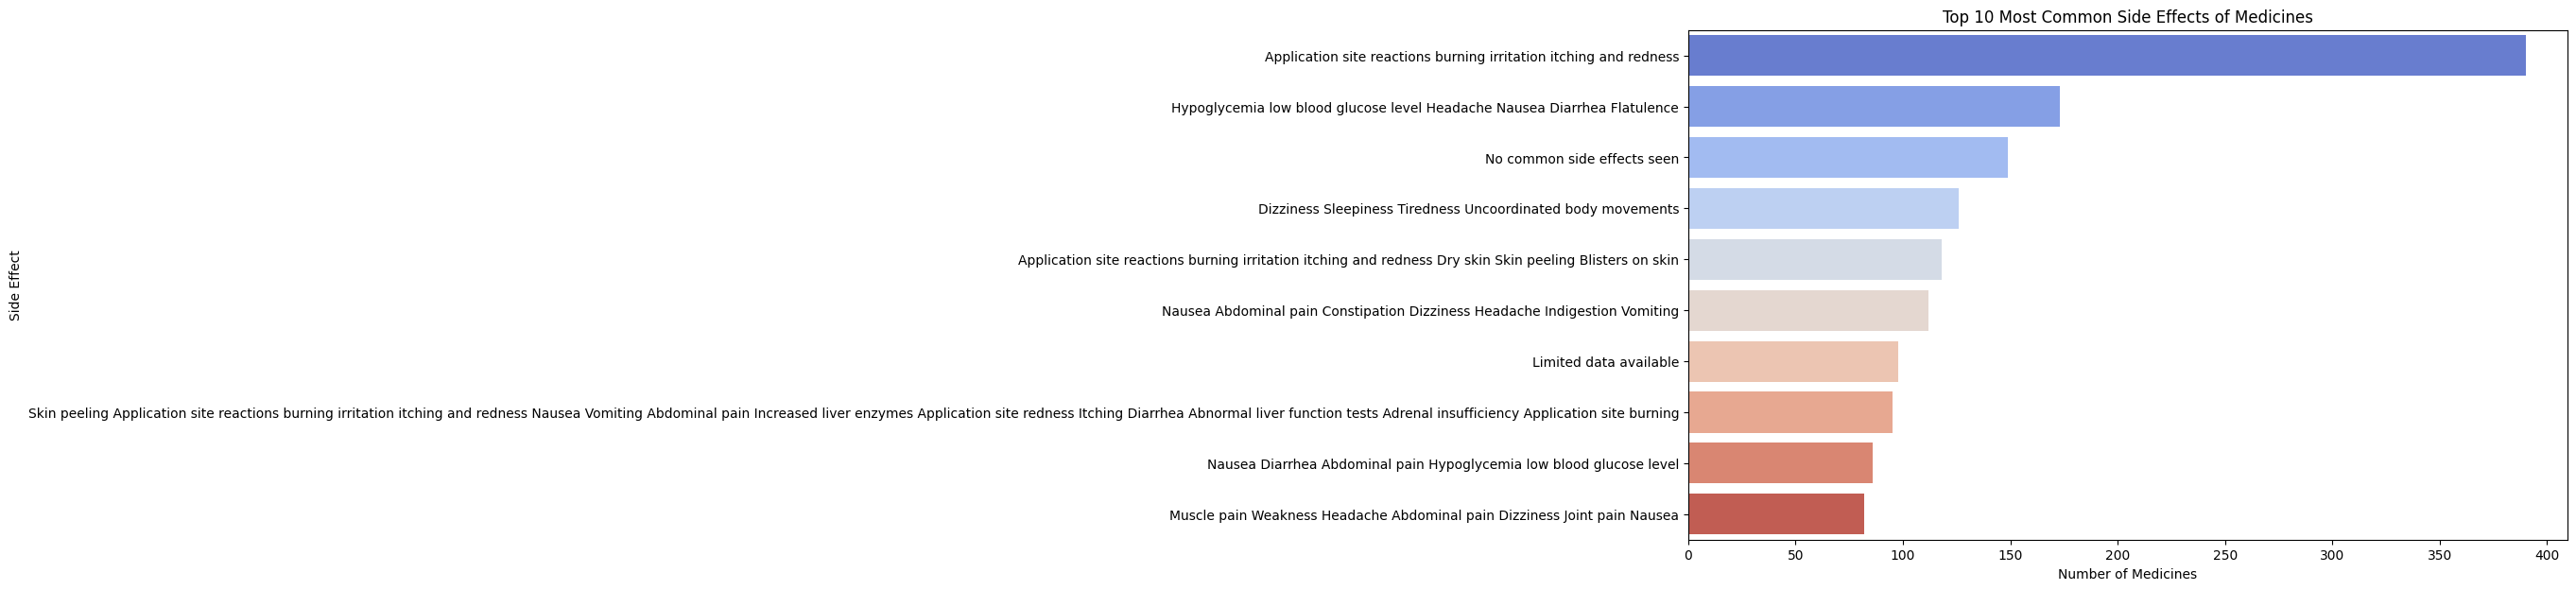

In [38]:
# Splitting the side effects and counting the occurrences
side_effects = df['Side_effects'].str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=side_effects.index, x=side_effects.values, palette="coolwarm")
plt.title('Top 10 Most Common Side Effects of Medicines')
plt.xlabel('Number of Medicines')
plt.ylabel('Side Effect')
plt.show()

Visualizing the spread between excellent, average, and poor reviews for medicines to understand the general sentiment using Review Spead Analysis

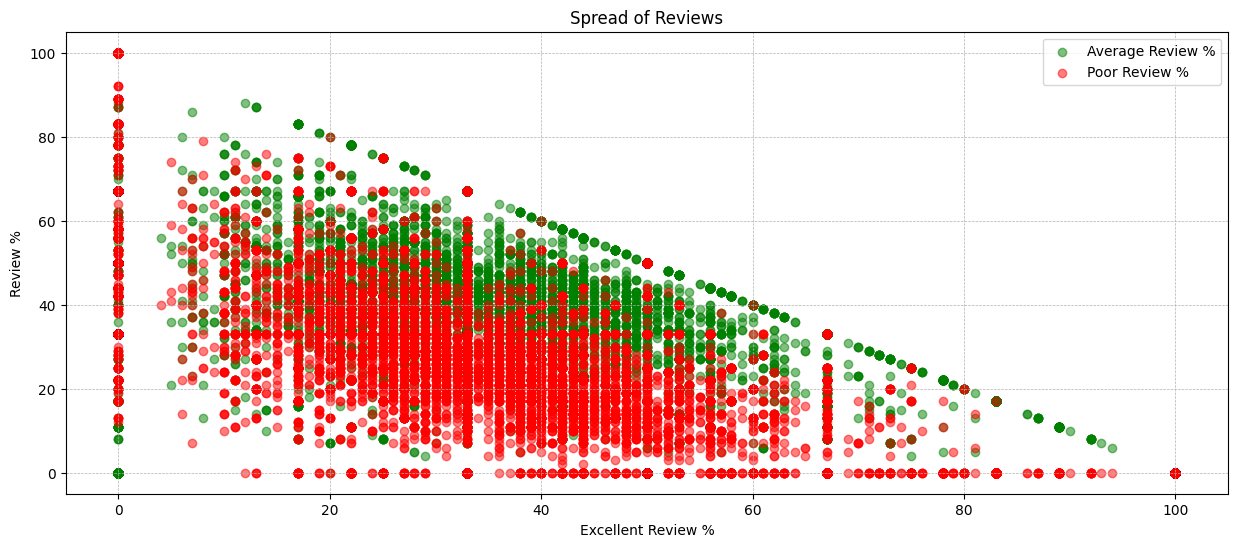

In [39]:
# Review Spread Analysis
plt.figure(figsize=(15, 6))

# Scatter plot to visualize the spread
plt.scatter(df['Excellent Review %'], df['Average Review %'], color='green', label='Average Review %', alpha=0.5)
plt.scatter(df['Excellent Review %'], df['Poor Review %'], color='red', label='Poor Review %', alpha=0.5)

plt.title('Spread of Reviews')
plt.xlabel('Excellent Review %')
plt.ylabel('Review %')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Creating Word Clouds for both "Uses" and "Side Effects" to get a visual representation of the most common uses of medicines and their side effects. We'll start with the word cloud for "Uses"


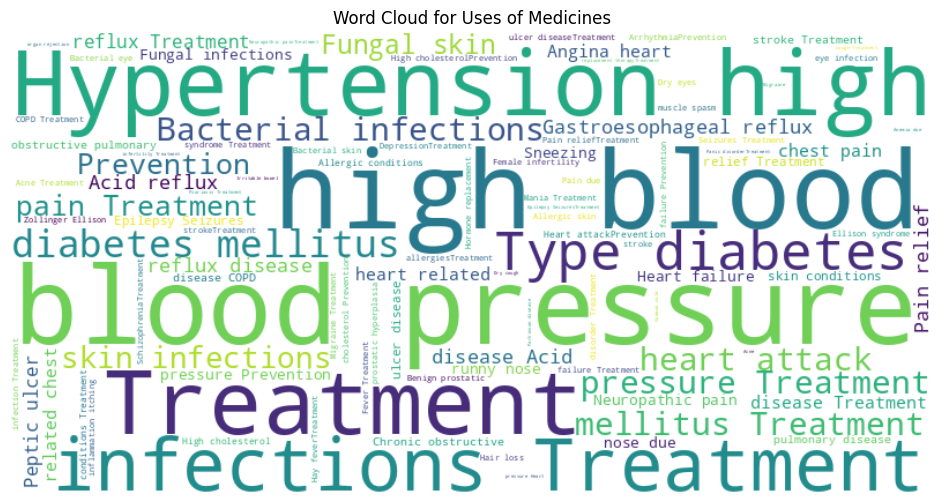

In [40]:
from wordcloud import WordCloud

# Generate word cloud for Uses
uses_text = ' '.join(df['Uses'])
wordcloud_uses = WordCloud(background_color='white', width=800, height=400, max_words=100).generate(uses_text)

# Plotting the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_uses, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Uses of Medicines')
plt.show()

Now with the word cloud for Side-effects

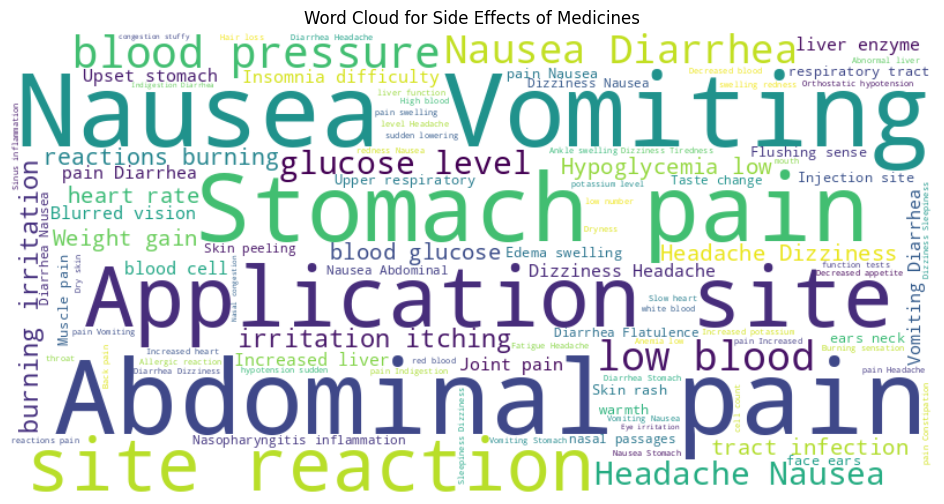

In [41]:
# Generate word cloud for Side Effects
side_effects_text = ' '.join(df['Side_effects'])
wordcloud_side_effects = WordCloud(background_color='white', width=800, height=400, max_words=100).generate(side_effects_text)

# Plotting the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_side_effects, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Side Effects of Medicines')
plt.show()

# **Model Training**

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import plotly.express as px
from nltk.corpus import stopwords
import re

# Combine text features into a single feature
df['Combined Features'] = df['Uses'].fillna('') + ' ' + df['Side_effects'].fillna('') + ' ' + df['Composition'].fillna('')

# Advanced Vectorization
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2))
feature_matrix = vectorizer.fit_transform(df['Combined Features'])

# Clustering for Group-Based Recommendations
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(feature_matrix)
df['Cluster'] = kmeans.labels_

# A. Enhanced Symptom-to-Medicine Recommendation with Prioritization
def recommend_medicines_for_problem(problem, num_recommendations=5):
    # Normalize the problem text
    problem = problem.lower()

    # NLP-based matching
    problem_vector = vectorizer.transform([problem])
    similarity_scores = cosine_similarity(problem_vector, feature_matrix).flatten()

    # Adding similarity scores to DataFrame
    df['Relevance'] = similarity_scores

    # Debug print statements
    print("Similarity Scores:")
    print(df[['Medicine Name', 'Relevance']].sort_values(by='Relevance', ascending=False).head(10))  # Show more scores for debugging

    # Check for matches in 'Uses' column
    uses_match = df[df['Uses'].str.lower().str.contains(problem, case=False, na=False, regex=True)]
    print("\nUses Match DataFrame:")
    print(uses_match[['Medicine Name', 'Uses', 'Relevance']].sort_values(by='Relevance', ascending=False).head(10))

    if not uses_match.empty:
        # Return recommendations from the 'Uses' column with higher relevance
        recommendations = uses_match.nlargest(num_recommendations, 'Relevance')
    else:
        # If no match in 'Uses', check 'Side_effects'
        side_effects_match = df[df['Side_effects'].str.lower().str.contains(problem, case=False, na=False, regex=True)].copy()
        print("\nSide Effects Match DataFrame:")
        print(side_effects_match[['Medicine Name', 'Side_effects', 'Relevance']].sort_values(by='Relevance', ascending=False).head(10))

        if not side_effects_match.empty:
            # Adjust relevance score based on 'Side_effects' match
            side_effects_match.loc[:, 'Relevance'] *= 0.8  # Lower weight for 'Side_effects'
            recommendations = side_effects_match.nlargest(num_recommendations, 'Relevance')
        else:
            return "No medicines found for the specified problem."

    return recommendations[['Medicine Name', 'Uses', 'Side_effects', 'Excellent Review %', 'Relevance']]

# B. Enhanced Composition-based Recommendation with Side-Effect Weighting
def recommend_alternate_medicines(composition, min_effectiveness=0, side_effects_to_avoid=[], num_recommendations=5):
    # Filter based on composition and effectiveness
    filtered_df = df[(df['Composition'].str.contains(composition, case=False, na=False)) &
                     (df['Excellent Review %'] >= min_effectiveness)]

    if side_effects_to_avoid:
        filtered_df = filtered_df[~filtered_df['Side_effects'].apply(lambda x: any(se in x for se in side_effects_to_avoid))]

    if filtered_df.empty:
        return f"No alternate medicines found with the composition '{composition}'."

    filtered_df['Side-effect Count'] = filtered_df['Side_effects'].apply(lambda x: len(x.split(',')))

    # Sorting by effectiveness and side-effect count
    recommendations = filtered_df.sort_values(by=['Excellent Review %', 'Side-effect Count'], ascending=[False, True])

    return recommendations[['Medicine Name', 'Composition', 'Uses', 'Excellent Review %', 'Side_effects']].head(num_recommendations)

# Interactive Visualization using Plotly
def visualize_medicine_profile(medicine_name):
    if medicine_name not in df['Medicine Name'].values:
        return f"Medicine '{medicine_name}' not found in the database."

    medicine = df[df['Medicine Name'] == medicine_name].iloc[0]

    attributes = ['Excellent Review %', 'Side-effect Count']
    values = [medicine['Excellent Review %'], len(medicine['Side_effects'].split(','))]

    fig = px.bar(x=attributes, y=values, title=f"Profile of {medicine_name}", labels={'x': 'Attribute', 'y': 'Value'})
    fig.show()

# User Interaction Function
def get_user_choice():
    print("Welcome to the Advanced Medicine Recommendation System!")
    print("Please choose an option:")
    print("1. Get recommendations based on your problem or symptoms")
    print("2. Find alternate medicines based on composition and reviews")
    print("3. Visualize a medicine profile")

    choice = input("Enter your choice (1, 2, or 3): ").strip()

    if choice == '1':
        problem = input("Enter the problem or symptom you are experiencing (e.g., headache, inflammation): ").strip()
        recommendations = recommend_medicines_for_problem(problem)
        print("Recommended medicines for your problem:")
        print(recommendations)

    elif choice == '2':
        composition = input("Enter the key composition or active ingredient of the medicine (e.g., Ibuprofen, Paracetamol): ").strip()
        min_effectiveness = input("Enter the minimum review percentage (0-100, leave empty if no preference): ").strip()
        min_effectiveness = int(min_effectiveness) if min_effectiveness else 0

        side_effects_to_avoid = input("Enter any side effects to avoid (comma separated, leave empty if no preference): ").strip().split(',')
        side_effects_to_avoid = [se.strip() for se in side_effects_to_avoid if se.strip()]

        recommendations = recommend_alternate_medicines(composition, min_effectiveness=min_effectiveness, side_effects_to_avoid=side_effects_to_avoid)
        print("Alternate medicines with similar composition:")
        print(recommendations)

    elif choice == '3':
        medicine_name = input("Enter the name of the medicine to visualize its profile: ").strip()
        visualization_result = visualize_medicine_profile(medicine_name)
        if isinstance(visualization_result, str):
            print(visualization_result)

    else:
        print("Invalid choice. Please enter 1, 2, or 3.")

# Example Usage
get_user_choice()


Welcome to the Advanced Medicine Recommendation System!
Please choose an option:
1. Get recommendations based on your problem or symptoms
2. Find alternate medicines based on composition and reviews
3. Visualize a medicine profile
Enter your choice (1, 2, or 3): 1
Enter the problem or symptom you are experiencing (e.g., headache, inflammation): headache
Similarity Scores:
                  Medicine Name  Relevance
685         Almotan 6.25 Tablet   0.107520
803         Almotan 12.5 Tablet   0.106035
8967         Syscan 150 Capsule   0.100723
7223          Odicon 150 Tablet   0.100723
2606   Fungid Best 150mg Tablet   0.100723
11445          Zocon 150 Tablet   0.100723
2515      Fungiset 150mg Tablet   0.100723
6339         Nuforce 150 Tablet   0.100723
2668        Fluzol 150mg Tablet   0.100723
5077        leocan 150mg Tablet   0.100723

Uses Match DataFrame:
                             Medicine Name  \
685                    Almotan 6.25 Tablet   
803                    Almotan 12.5 T